In [121]:
#general, exploration libraries:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#machine learning libraries:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
##models and metrics:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_recall_curve

In [32]:
df = pd.read_csv("Breast_Cancer.csv")
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [33]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [36]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
4019    False
4020    False
4021    False
4022    False
4023    False
Length: 4024, dtype: bool


General Exploration

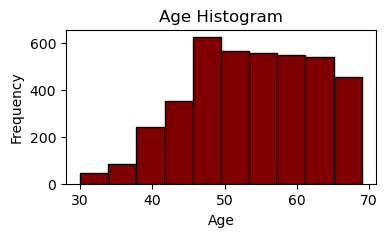

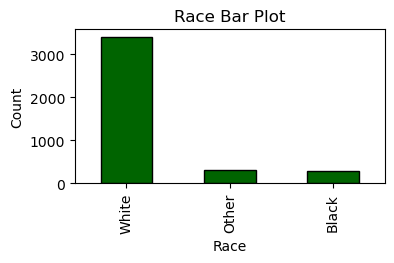

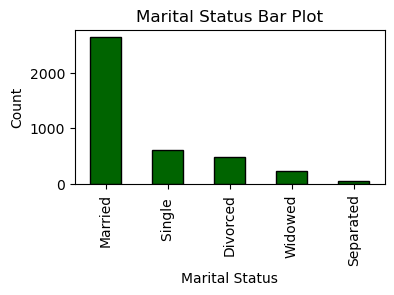

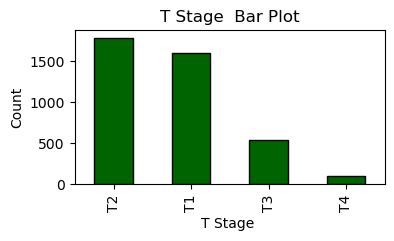

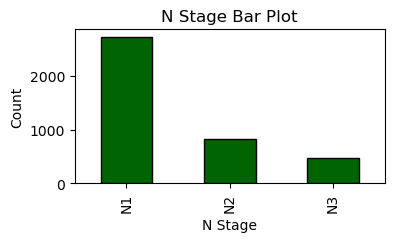

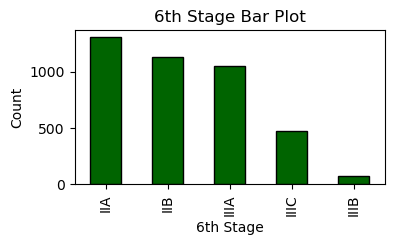

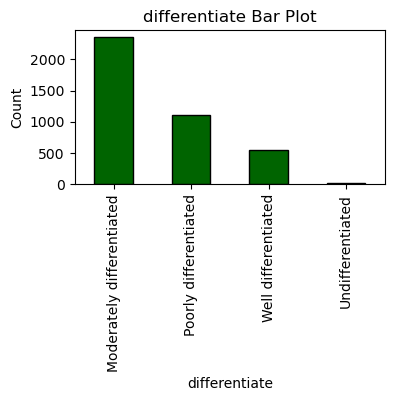

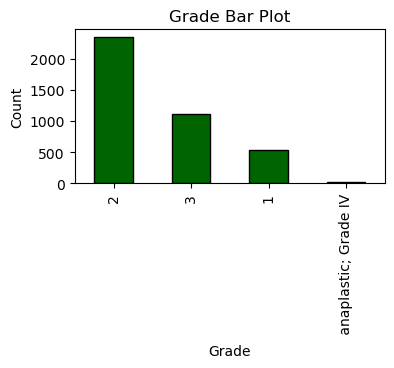

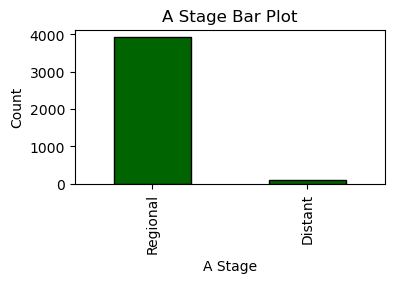

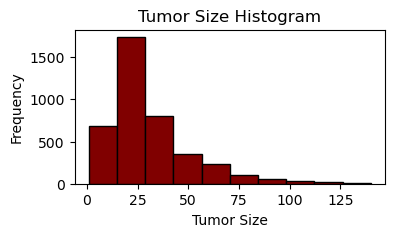

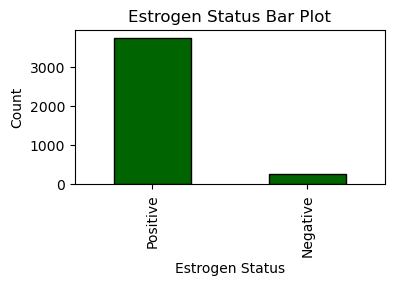

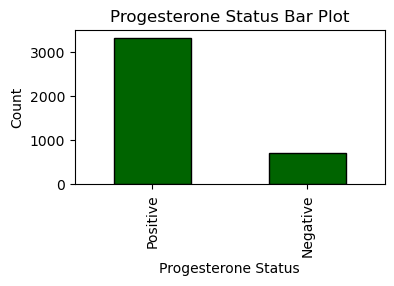

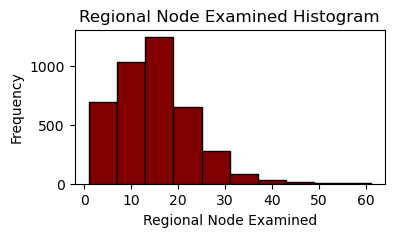

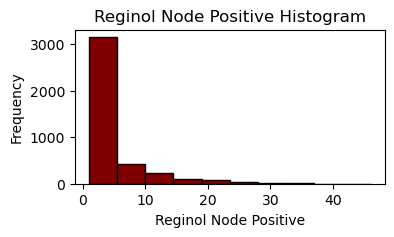

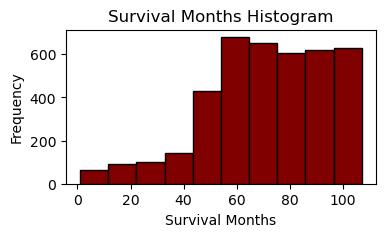

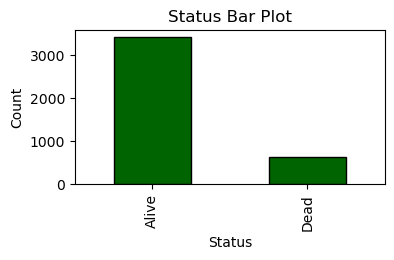

In [93]:
# I created a loop through every column in the dataset to get the graphs for all of them without writing separate functions
for column in df.columns:
    plt.figure(figsize=(4, 2))  
    if df[column].dtype in ['int64', 'float64']:  
        # Numerical columns: histograms
        plt.hist(df[column], color='maroon', edgecolor='black')
        plt.title(f"{column} Histogram")
        plt.xlabel(column)
        plt.ylabel("Frequency")
    else:
        # Categorical columns: bar plots
        df[column].value_counts().plot(kind='bar', color='darkgreen', edgecolor='black')
        plt.title(f"{column} Bar Plot")
        plt.xlabel(column)
        plt.ylabel("Count")
    plt.show()

In [129]:
no_columns = df.select_dtypes(include=['number']).columns
print("Numerical columns:", no_columns)

Numerical columns: Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months'],
      dtype='object')


In [53]:
# Interquartile Range (IQR) method for outlier detection in numerical columns
for column in no_columns:
    Q1 = df[column].quantile(0.25)  # minority
    Q3 = df[column].quantile(0.75)  # majority
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")#formatted percentage string 

Age: 0 outliers (0.00%)
Tumor Size: 222 outliers (5.52%)
Regional Node Examined: 72 outliers (1.79%)
Reginol Node Positive: 344 outliers (8.55%)
Survival Months: 18 outliers (0.45%)


deleting outliers in columns with low outlier percentage

In [99]:
 def remove_outliers(df, column):
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [63]:
 df_cleaned = df.copy()  
df_cleaned = remove_outliers(df_cleaned, 'Regional Node Examined')
df_cleaned = remove_outliers(df_cleaned, 'Survival Months')
print(f"Data after outlier removal:\n{df_cleaned[['Regional Node Examined', 'Survival Months']].describe()}")

Data after outlier removal:
       Regional Node Examined  Survival Months
count             3545.000000      3545.000000
mean                15.896756        71.534838
std                  7.309936        22.510882
min                  5.000000         5.000000
25%                 11.000000        56.000000
50%                 15.000000        73.000000
75%                 20.000000        90.000000
max                 61.000000       107.000000


Applying Winsorization to columns with higher outlier percentages; replacing them with the nearest non-outlier or normal boundary

In [65]:
# Winsorization
df_cleaned['Tumor Size'] = winsorize(df_cleaned['Tumor Size'], limits=[0.05, 0.05])
df_cleaned['Regional Node Positive'] = winsorize(df_cleaned['Reginol Node Positive'], limits=[0.05, 0.05])#proportion of data to clip
 
print(f"New Tumor Size Values:\n{df_cleaned['Tumor Size'].describe()}")
print(f"New Regional Node Positive Values:\n{df_cleaned['Reginol Node Positive'].describe()}")

New Tumor Size Values:
count    3545.000000
mean       30.454725
std        18.228647
min        10.000000
25%        17.000000
50%        25.000000
75%        40.000000
max        75.000000
Name: Tumor Size, dtype: float64
New Regional Node Positive Values:
count    3545.000000
mean        4.529478
std         5.310696
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        46.000000
Name: Reginol Node Positive, dtype: float64


one-hot encoding for categorical columns 

In [67]:
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

print(df_encoded.head())

   Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
0   68          10                      24                      1   
1   50          35                      14                      5   
2   58          63                      14                      7   
5   51          20                      18                      2   
6   51          10                      11                      1   

   Survival Months  Regional Node Positive  Race_Other  Race_White  \
0               60                       1       False        True   
1               62                       5       False        True   
2               75                       7       False        True   
5               89                       2       False        True   
6               54                       1       False        True   

   Marital Status_Married  Marital Status_Separated  ...  \
0                    True                     False  ...   
1                    True                   

Correlations

In [69]:
 df_encoded.corr()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Regional Node Positive,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,...,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Status_Dead
Age,1.000000,-0.076101,0.000330,0.027778,-0.005426,0.024573,-0.095270,0.102603,-0.058642,-0.032821,...,-0.092687,-0.011831,0.056843,0.056843,0.047974,-0.092687,0.022847,0.060642,-0.022495,0.049203
Tumor Size,-0.076101,1.000000,0.062198,0.237524,-0.087716,0.272856,0.005693,-0.003802,-0.027347,0.007946,...,0.092777,0.049891,-0.082119,-0.082119,-0.036537,0.092777,-0.117379,-0.053218,-0.072471,0.138144
Regional Node Examined,0.000330,0.062198,1.000000,0.364613,-0.021721,0.317031,0.009287,0.006237,-0.019122,0.023857,...,0.038501,-0.014293,-0.067199,-0.067199,0.012491,0.038501,-0.061540,-0.051276,-0.011191,0.035648
Reginol Node Positive,0.027778,0.237524,0.364613,1.000000,-0.143287,0.955931,-0.000268,-0.005268,-0.048214,0.057714,...,0.117016,0.022512,-0.080362,-0.080362,-0.055853,0.117016,-0.237442,-0.090698,-0.080293,0.274246
Survival Months,-0.005426,-0.087716,-0.021721,-0.143287,1.000000,-0.145448,0.023181,0.020908,0.039441,-0.046959,...,-0.069754,-0.023201,0.028155,0.028155,0.048143,-0.069754,0.068475,0.134610,0.088549,-0.475303
Regional Node Positive,0.024573,0.272856,0.317031,0.955931,-0.145448,1.000000,0.003987,-0.013263,-0.051945,0.053185,...,0.130035,0.031455,-0.092275,-0.092275,-0.061004,0.130035,-0.244696,-0.094173,-0.087423,0.278977
Race_Other,-0.095270,0.005693,0.009287,-0.000268,0.023181,0.003987,1.000000,-0.690139,0.059032,0.000366,...,0.014011,-0.021663,0.007662,0.007662,-0.014811,0.014011,0.000333,-0.019741,-0.010940,-0.041039
Race_White,0.102603,-0.003802,0.006237,-0.005268,0.020908,-0.013263,-0.690139,1.000000,0.073979,-0.040543,...,-0.058553,-0.000672,0.003473,0.003473,0.051310,-0.058553,0.007004,0.055596,0.029791,-0.025381
Marital Status_Married,-0.058642,-0.027347,-0.019122,-0.048214,0.039441,-0.051945,0.059032,0.073979,1.000000,-0.142666,...,-0.029341,-0.012343,0.017138,0.017138,0.017040,-0.029341,0.022802,0.009666,0.021890,-0.063004
Marital Status_Separated,-0.032821,0.007946,0.023857,0.057714,-0.046959,0.053185,0.000366,-0.040543,-0.142666,1.000000,...,-0.003331,0.030477,0.001995,0.001995,-0.002817,-0.003331,-0.037134,-0.049663,-0.039992,0.049276


In [71]:
corr_matrix = df_encoded.corr()

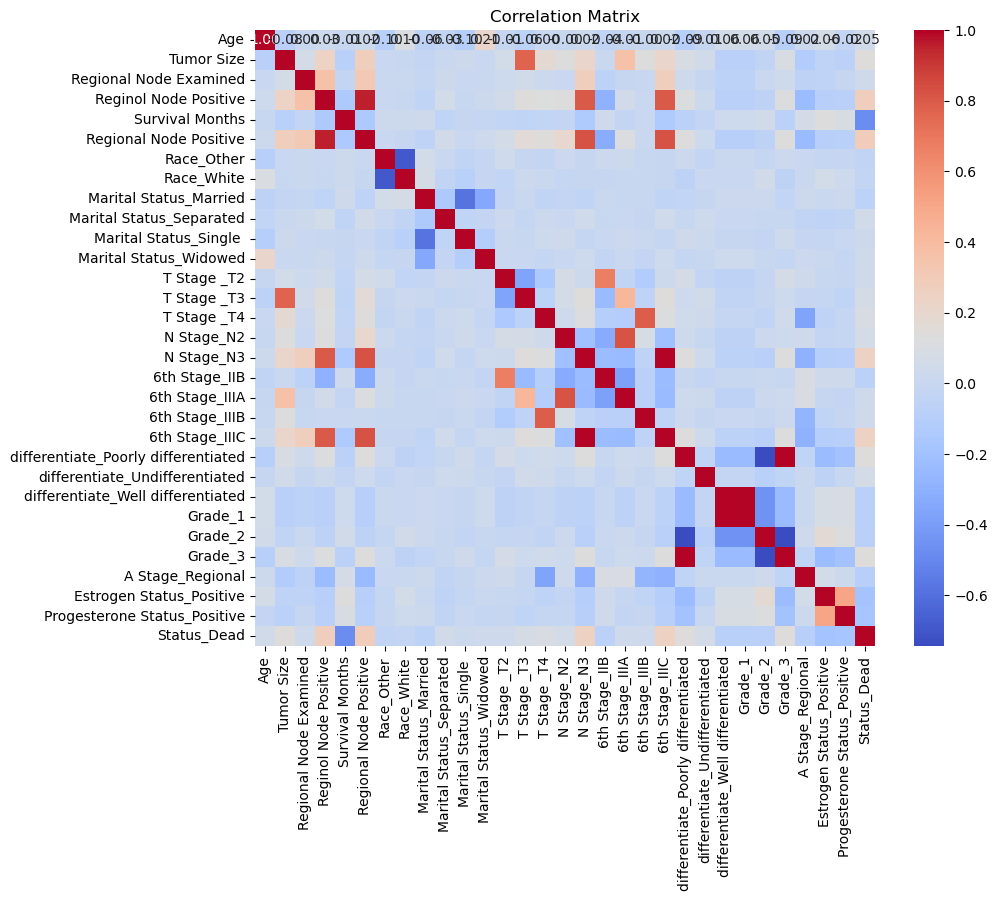

In [73]:
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()

Finding moderate to strong correlations (0.4-0.8)

In [101]:
def get_positive_correlations(df_encoded, correlation_thresholds=(0.4, 0.8)):

    lower_threshold, upper_threshold = correlation_thresholds

    filtered_correlations = corr_matrix[(corr_matrix > lower_threshold) & 
                                        (corr_matrix <= upper_threshold)]

    
    for col in filtered_correlations.columns: #self-correlations
        filtered_correlations.loc[col, col] = None
    
     
    correlations_long = filtered_correlations.stack().reset_index()
    correlations_long.columns = ['Feature 1', 'Feature 2', 'Correlation']

    result = correlations_long[correlations_long['Feature 1'] < correlations_long['Feature 2']]
    
    return result

correlation_thresholds = (0.4, 0.8)
positive_correlations = get_positive_correlations(df_encoded, correlation_thresholds)
positive_correlations

,Feature 1,Feature 2,Correlation
2,T Stage _T3,Tumor Size,0.769283
5,6th Stage_IIB,T Stage _T2,0.669893
6,6th Stage_IIIA,T Stage _T3,0.421464
7,6th Stage_IIIB,T Stage _T4,0.790719
8,Estrogen Status_Positive,Progesterone Status_Positive,0.512275


In [105]:
 df_2 = df_cleaned.copy()
 
target_column = 'Status'
X = df_2.drop(columns=[target_column])  # Features
Y = df_2[target_column]  # Target

 
categorical_columns = X.select_dtypes(include=['object', 'category']).columns

X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Standardization
scaler = StandardScaler()
X_encoded[no_columns] = scaler.fit_transform(X_encoded[no_columns])

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

print("Train Features:\n", X_train.head())
print("Train Target:\n", Y_train.head())

Train Features:
            Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
604   0.026205   -0.299281                0.835042              -0.664692   
2308 -1.531318   -0.902812                0.287765              -0.099714   
3091  0.804966   -0.134682               -1.354068              -0.664692   
4021  1.583727   -0.463881               -0.669971              -0.288040   
1416 -1.197563   -0.793079               -0.396332               0.276937   

      Survival Months  Regional Node Positive  Race_Other  Race_White  \
604          0.953681                       1       False        True   
2308         0.553818                       4       False        True   
3091         0.065096                       1       False        True   
4021        -0.112621                       3       False        True   
1416         0.998110                       6       False        True   

      Marital Status_Married  Marital Status_Separated  ...  6th Stage_IIIC  \
60

In [109]:
log_reg = LogisticRegression()
random_forest = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Training
log_reg.fit(X_train, Y_train)
random_forest.fit(X_train, Y_train)
svm_model.fit(X_train, Y_train)

# Evaluation
models = {
    "Logistic Regression": log_reg,
    "Random Forest": random_forest,
    "SVM": svm_model #support vector machine
}

for name, model in models.items():
    Y_pred = model.predict(X_test)
    Y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.2f}")
    print(f"Classification Report:\n{classification_report(Y_test, Y_pred)}")
    if Y_prob is not None:
        print(f"ROC-AUC: {roc_auc_score(Y_test, Y_prob):.2f}")


Logistic Regression:
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

       Alive       0.92      0.98      0.95       607
        Dead       0.81      0.50      0.62       102

    accuracy                           0.91       709
   macro avg       0.87      0.74      0.78       709
weighted avg       0.91      0.91      0.90       709

ROC-AUC: 0.87

Random Forest:
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

       Alive       0.91      0.98      0.95       607
        Dead       0.82      0.45      0.58       102

    accuracy                           0.91       709
   macro avg       0.87      0.72      0.76       709
weighted avg       0.90      0.91      0.90       709

ROC-AUC: 0.87

SVM:
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

       Alive       0.90      0.99      0.94       607
        Dead       0.87      0.32      0.47       1

Possible Solution for Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

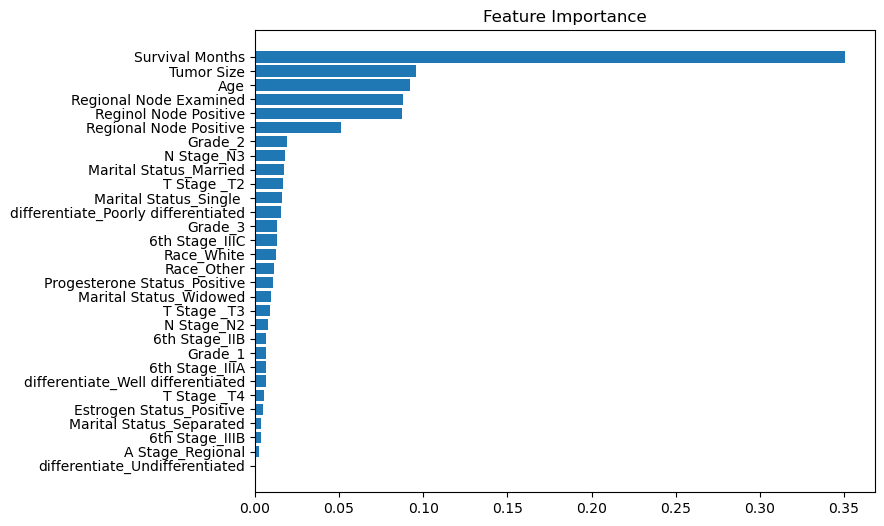

In [127]:
importances = random_forest.feature_importances_
feature_names = X_encoded.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(importances)), importances[sorted_indices])
plt.yticks(range(len(importances)), feature_names[sorted_indices])
plt.title("Feature Importance")
plt.show()